In [18]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Loading Packages and Data

In [19]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Load Data
data ='/content/gdrive/My Drive/Data Science with Python Spring 2020/Untitled spreadsheet - Sheet1.csv'
#load to dataframe
df = pd.read_csv(data)
df

,Index,True Age,Age Felt,Age Difference,Zscore,Younger or Older,Comment
0,1,69.0,11,58,2.659740,Feel Younger,Brain
1,1,80.0,23,57,2.592872,Feel Younger,NaN
2,1,65.0,117,52,2.258533,Feel Older,Drank Magic Water
3,1,75.0,25,50,2.124798,Feel Younger,NaN
4,1,67.0,18,49,2.057930,Feel Younger,NaN
...,...,...,...,...,...,...,...
129,1,72.0,42,30,0.787443,Feel Younger,NaN
130,1,58.0,25,33,0.988046,Feel Younger,NaN
131,1,66.0,66,0,-1.218590,Feel The Same Age,NaN
132,1,69.0,40,29,0.720575,Feel Younger,NaN


# Changing Data Types & Recoding Columns

In [20]:
#Change Data Type
df['True Age'] = df['True Age'].astype('int')
#Bucket Ages into Age Groups
df['Age_Groups'] = np.where(df['True Age'] <= 15, "Child",
                            np.where((df['True Age'] >15) & (df['True Age'] <25),"Young Adult",
                            np.where((df['True Age'] >25) & (df['True Age'] <=50),"Adult",        
                            np.where((df['True Age'] >50) & (df['True Age'] <=65),"Older Adult","Senior"))))                             
#show columns generated
for cols in df:
  print(cols)
df.head()

Index
True Age
Age Felt
Age Difference
Zscore
Younger or Older
Comment
Age_Groups


,Index,True Age,Age Felt,Age Difference,Zscore,Younger or Older,Comment,Age_Groups
0,1,69,11,58,2.659740,Feel Younger,Brain,Senior
1,1,80,23,57,2.592872,Feel Younger,NaN,Senior
2,1,65,117,52,2.258533,Feel Older,Drank Magic Water,Older Adult
3,1,75,25,50,2.124798,Feel Younger,NaN,Senior
4,1,67,18,49,2.057930,Feel Younger,NaN,Senior



#Exploratory Data Analysis (EDA)

In [21]:
#total participants  = 134 Particpants
df['Index'].sum()

134

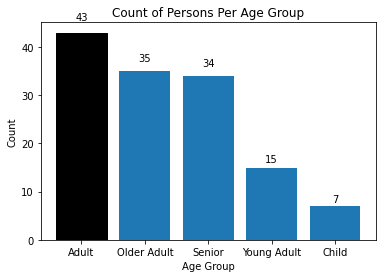

In [22]:

subx = df['Age_Groups'].value_counts().to_frame()
#show the age groups by count
#43 Adults , 35 Older Adults, 34 Seniors, 15 Young Adults and 7 Childeren)
subx.sort_values(by =['Age_Groups'], ascending=False)
labels = subx['Age_Groups']
fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.bar(subx.index, height = subx.Age_Groups)

g[0].set_color('k')
plt.title("Count of Persons Per Age Group")
plt.xlabel(g)
plt.xlabel("Age Group")
plt.ylabel("Count")
#good function to label graph
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(g)


**How many people feel yonger than they are? How Many feel older? How many feel the same age?**

Feel Older: 10 %
Feel Younger: 84 %
Feel Same Age: 7 %


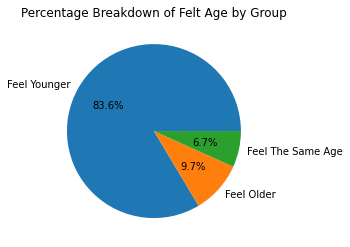

In [23]:
#subsetting data frame by condition in Younger or Older column
Feel_Older = df[(df['Younger or Older'] == 'Feel Older')].count() 
Feel_Younger = df[(df['Younger or Older'] == 'Feel Younger')].count()
Feel_SameAge = df[(df['Younger or Older'] == 'Feel The Same Age')].count()
#counting by subset and dividing by total participants
print ("Feel Older:",round(Feel_Older['Index'].sum()/df['Index'].sum()*100),"%")
print ("Feel Younger:",round(Feel_Younger['Index'].sum()/df['Index'].sum()*100),"%")
print ("Feel Same Age:",round(Feel_SameAge['Index'].sum()/df['Index'].sum()*100),"%")
#plottting results
j = df['Younger or Older'].value_counts().to_frame()


#show the age groups by count
#43 Adults , 35 Older Adults, 34 Seniors, 15 Young Adults and 7 Childeren)
j.sort_values(by= ['Younger or Older'], ascending=False)
labels = j.index
fig = plt.figure()
plt.title("Percentage Breakdown of Felt Age by Group")
m = plt.pie(x = j['Younger or Older'], labels = labels, autopct='%1.1f%%')



Wow it looks like 84% of participants feel younger than there actuall age!

#Age Group Breakdown: What % Of Each Group Feels Younger / Older/ Same Age

In [24]:
#Subsetting Each DataFrame by Age Group
Children = df[(df['Age_Groups'] == 'Child')]
YoungAdult = df[(df['Age_Groups'] == 'Young Adult')]
Adult = df[(df['Age_Groups'] == 'Adult')]
OlderAdult = df[(df['Age_Groups'] == 'Older Adult')]
Senior = df[(df['Age_Groups'] == 'Senior')]
#Further Subtting by Age Felt by Participant
Senior_Feel_Younger = Senior[(Senior['Younger or Older'] == 'Feel Younger')].count()
Older_Adult_Feel_Younger = OlderAdult[(OlderAdult['Younger or Older'] == 'Feel Younger')].count()
Adult_Feel_Younger = Adult[(Adult['Younger or Older'] == 'Feel Younger')].count()
Young_Adult_Feel_Younger = YoungAdult[(YoungAdult['Younger or Older'] == 'Feel Younger')].count()
Children_Feel_Younger = Children[(Children['Younger or Older'] == 'Feel Younger')].count()

print (" % of Seniors who feel younger:",round(Senior_Feel_Younger['Index'].sum()/Senior['Index'].sum()*100),"%")
print (" % of Older Adults who feel younger:",round(Older_Adult_Feel_Younger ['Index'].sum()/OlderAdult['Index'].sum()*100),"%")
print (" % of Adults who feel younger:",round(Adult_Feel_Younger['Index'].sum()/Adult['Index'].sum()*100),"%")
print (" % of Younger Adults who feel younger:",round(Young_Adult_Feel_Younger['Index'].sum()/YoungAdult['Index'].sum()*100),"%")
print (" % of Children who feel younger:",round(Children_Feel_Younger['Index'].sum()/Children['Index'].sum()*100),"%")

 % of Seniors who feel younger: 88 %
 % of Older Adults who feel younger: 91 %
 % of Adults who feel younger: 86 %
 % of Younger Adults who feel younger: 60 %
 % of Children who feel younger: 57 %


It appears that Older Adults feel Younger more often than any other group with Seniors and Adults trailing. Children appear to feel younger the least out of these groups**

**Who feels the Same Age?**

In [25]:

Senior_Feel_Younger = Senior[(Senior['Younger or Older'] == 'Feel Older')].count()
Older_Adult_Feel_Younger = OlderAdult[(OlderAdult['Younger or Older'] == 'Feel Older')].count()
Adult_Feel_Younger = Adult[(Adult['Younger or Older'] == 'Feel Older')].count()
Young_Adult_Feel_Younger = YoungAdult[(YoungAdult['Younger or Older'] == 'Feel Older')].count()
Children_Feel_Younger = Children[(Children['Younger or Older'] == 'Feel Older')].count()

print (" % of Seniors who Feel Older:",round(Senior_Feel_Younger['Index'].sum()/Senior['Index'].sum()*100),"%")
print (" % of Older Adults who Feel Older:",round(Older_Adult_Feel_Younger ['Index'].sum()/OlderAdult['Index'].sum()*100),"%")
print (" % of Adults who Feel Older:",round(Adult_Feel_Younger['Index'].sum()/Adult['Index'].sum()*100),"%")
print (" % of Younger Adults Feel Older:",round(Young_Adult_Feel_Younger['Index'].sum()/YoungAdult['Index'].sum()*100),"%")
print (" % of Children Feel Older:",round(Children_Feel_Younger['Index'].sum()/Children['Index'].sum()*100),"%")

 % of Seniors who Feel Older: 3 %
 % of Older Adults who Feel Older: 3 %
 % of Adults who Feel Older: 9 %
 % of Younger Adults Feel Older: 40 %
 % of Children Feel Older: 14 %


It appears that  40% of Younger Adults feel older! This is an interesting find with the Children group trailing


**Who feels the Same Age?**

In [26]:
#@title Default title text

Senior_Feel_Younger = Senior[(Senior['Younger or Older'] == 'Feel The Same Age')].count()
Older_Adult_Feel_Younger = OlderAdult[(OlderAdult['Younger or Older'] == 'Feel The Same Age')].count()
Adult_Feel_Younger = Adult[(Adult['Younger or Older'] == 'Feel The Same Age')].count()
Young_Adult_Feel_Younger = YoungAdult[(YoungAdult['Younger or Older'] == 'Feel The Same Age')].count()
Children_Feel_Younger = Children[(Children['Younger or Older'] == 'Feel The Same Age')].count()

print (" % of Seniors who feel the same age:",round(Senior_Feel_Younger['Index'].sum()/Senior['Index'].sum()*100),"%")
print (" % of Older Adults who feel the same age:",round(Older_Adult_Feel_Younger ['Index'].sum()/OlderAdult['Index'].sum()*100),"%")
print (" % of Adults who feel the same age:",round(Adult_Feel_Younger['Index'].sum()/Adult['Index'].sum()*100),"%")
print (" % of Younger Adults feel the same age:",round(Young_Adult_Feel_Younger['Index'].sum()/YoungAdult['Index'].sum()*100),"%")
print (" % of Children feel the same age:",round(Children_Feel_Younger['Index'].sum()/Children['Index'].sum()*100),"%")

 % of Seniors who feel the same age: 9 %
 % of Older Adults who feel the same age: 6 %
 % of Adults who feel the same age: 5 %
 % of Younger Adults feel the same age: 0 %
 % of Children feel the same age: 29 %


It appears that Children feel the same age more often than any other group with Seniors and Older Adults trailing. 


**Mean Age Difference for those feeling Younger**

In [27]:
#subset df by those feeling Younge
subset = df[(df['Younger or Older']== 'Feel Younger')]
subset.groupby('Age_Groups')['Age Difference'].mean().to_frame()

,Age Difference
Age_Groups,
Adult,10.918919
Child,4.000000
Older Adult,26.312500
Senior,31.466667
Young Adult,4.888889


Of those who feel yonger, Seniors on Average feel 31 Years Younger with Older Adults trailing at 26 years younger

Age_Groups
Adult          21.000000
Child           4.000000
Older Adult    52.000000
Senior         11.000000
Young Adult     6.833333
Name: Age Difference, dtype: float64

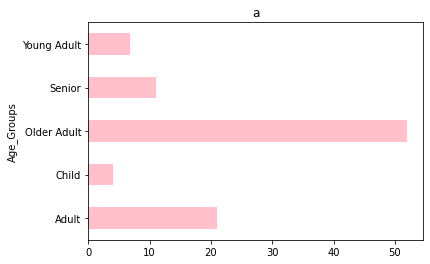

In [28]:
#subset df by those feeling Younger
subset = df[(df['Younger or Older']== 'Feel Older')]
subset.groupby('Age_Groups')['Age Difference'].mean().plot(kind='barh', color ='pink', title = 'a')
subset.groupby('Age_Groups')['Age Difference'].mean()

Of those who feel older, Older Adults on Average feel 52 Years Older and Adults trailing at 21 years older. But I beleive their are some outliers in the data..lets check!


# Descriptive Analysis of Age Difference

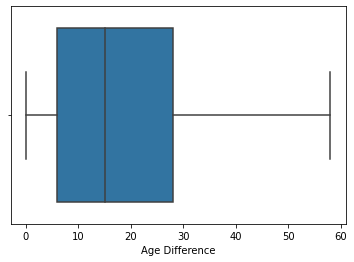

In [29]:
#First lets do a basic box and whiskers plot
import seaborn as sns
sns.boxplot(x = df['Age Difference'])

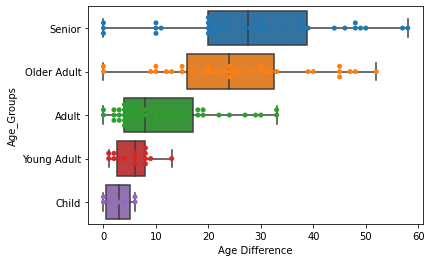

In [30]:
#lets do this across age groups just for fun!
sns.boxplot(x = df['Age Difference'], y= df['Age_Groups'])
sns.swarmplot(x = df['Age Difference'], y= df['Age_Groups'])

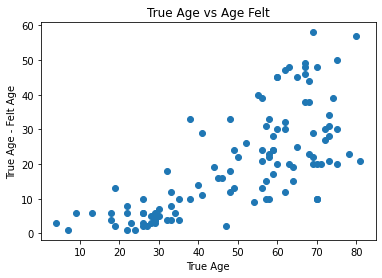

In [31]:
subset = df[(df['Younger or Older']== 'Feel Younger')]
plt.title("True Age vs Age Felt")
plt.xlabel("True Age")
plt.ylabel("True Age - Felt Age")
plt.scatter(x = subset['True Age'], 
            y = subset['Age Difference'])


**We see that there is a strong positive correlation between True Age and difference in (Actual Age - Felt Age). What this tells us is that as Seniors perceive themselves or feel less older than they are compared to other age groups ie the older you are the less old you feel**



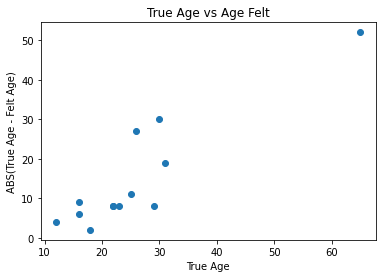

In [32]:
subset = df[(df['Younger or Older']== 'Feel Older')]
plt.title("True Age vs Age Felt")
plt.xlabel("True Age")
plt.ylabel("ABS(True Age - Felt Age)")
plt.scatter(x = subset['True Age'], 
            y = subset['Age Difference'])

We see we have an outliers at 0 and 60. Meaning very few people felt they were the same age physically and they perceived mentally + We had one senior say they felt 117 so thats an outlier outright!

We can use Z scores to find possible outliers and we use 
standard deviation (a measure of spread to do this)
use average and mean

In [33]:
Average_Age_Difference = df['Age Difference'].mean()
Standard_Deviation =round(df['Age Difference'].std())
Min = df['Age Difference'].min()
Max = df['Age Difference'].max()
Mode = df['Age Difference'].mode()
Median = df['Age Difference'].median()
Range = Max-Min
#Measuring Spead of Data Set
print("Range =", Range)
print("Median =", Median)
print("Standard Deviation=",Standard_Deviation)

Range = 58
Median = 15.0
Standard Deviation= 15


Thankfully Python is an awesome langauge for Stats use cases and we can print this in 1 line!

In [34]:
df.describe()

,Index,True Age,Age Felt,Age Difference,Zscore
count,134.0,134.000000,134.000000,134.000000,1.340000e+02
mean,1.0,47.492537,32.134328,18.223881,-1.664183e-11
std,0.0,20.656425,17.200188,14.954890,1.000000e+00
min,1.0,4.000000,1.000000,0.000000,-1.218590e+00
25%,1.0,29.000000,21.000000,6.000000,-8.173835e-01
50%,1.0,53.000000,29.000000,15.000000,-2.155737e-01
75%,1.0,65.000000,42.000000,28.000000,6.537072e-01
max,1.0,86.000000,117.000000,58.000000,2.659740e+00


**Lets plot a Kernel Distibution to see how skewed our data is**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Age Difference in Years')

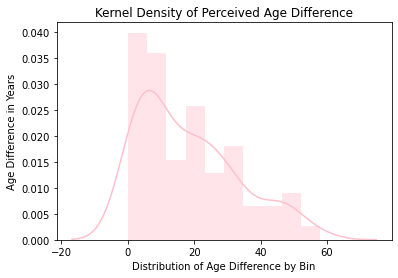

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.distplot(df['Age Difference'], kde= True, bins =10 , color = 'pink')
plt.title("Kernel Density of Perceived Age Difference")
plt.xlabel("Distribution of Age Difference by Bin")
plt.ylabel("Age Difference in Years")


It appears that our data is skewed right (positive) lets tackle this issue so we can make infernces about our data set!

# **Using Z scores to remove outliers and Standardize Data**

In [36]:
#Creating Z score column
df['Zscore_Python'] = ((df['Age Difference']-Average_Age_Difference)/Standard_Deviation)
#A rule of thummb is to remove any data point that is 3sigma away  but because our sample is smalll lets just use 1 sigma
#subset dataframe by sd
df_sd_sub = df[(df['Zscore_Python'] < 1) & (df['Zscore_Python'] > -1)]
# we have removed roughly 40 rows
print("Rows in New Outlier Free dataset:",df_sd_sub['Index'].count())
print("Rows in Origonal dataset:",df['Index'].count())

Rows in New Outlier Free dataset: 92
Rows in Origonal dataset: 134


**New Smoother Data Set**

In [37]:
print("New Min:",df_sd_sub['Age Difference'].max())
print("New Max:",df_sd_sub['Age Difference'].min())
print("Old Min:",df['Age Difference'].max())
print("Old Max:",df['Age Difference'].min())

New Min: 33
New Max: 4
Old Min: 58
Old Max: 0


Showing how we have reduced our spead to create a smoother distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Index,True Age,Age Felt,Age Difference,Zscore,Zscore_Python
count,92.0,92.000000,92.000000,92.000000,92.000000,92.000000
mean,1.0,46.641304,33.293478,16.347826,-0.125448,-0.125070
std,0.0,19.190532,13.815534,9.042555,0.604655,0.602837
min,1.0,9.000000,3.000000,4.000000,-0.951119,-0.948259
25%,1.0,29.750000,25.000000,8.000000,-0.683648,-0.681592
50%,1.0,48.500000,31.000000,15.500000,-0.182140,-0.181592
75%,1.0,62.000000,45.000000,23.250000,0.336085,0.335075
max,1.0,81.000000,60.000000,33.000000,0.988046,0.985075


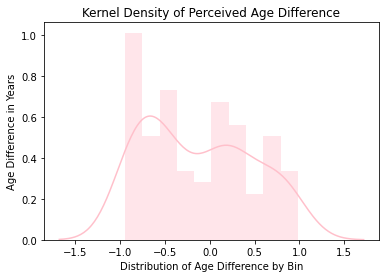

In [38]:
#plottining outlier free data
sns.distplot(df_sd_sub['Zscore_Python'], kde= True, bins =10 , color = 'pink')
plt.title("Kernel Density of Perceived Age Difference")
plt.xlabel("Distribution of Age Difference by Bin")
plt.ylabel("Age Difference in Years")
df_sd_sub.describe()

Nice! We were able to come up with a more normal distribution lets try one more technique ![alt text](https://)

It looks like our data is still positively skewed right lets try and normalize with *log*

# Log Scaling


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion')

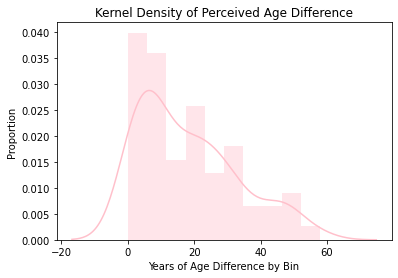

In [56]:
df_sd_sub["Age Difference Log"] = df["Age Difference"].apply(np.log)
#remove infinate values
df_sd_sub = df.replace([np.inf, -np.inf], np.nan)


sns.distplot(df_sd_sub.iloc[:,3], kde= True, bins =10 , color = 'pink')
plt.title("Kernel Density of Perceived Age Difference")
plt.xlabel("Years of Age Difference by Bin")
plt.ylabel("Proportion")


This was not that successful but is a good technique to try when trying to normalize data

# Min Max Scaling


In [57]:
#Min-Max normalization: z x-min(x)/ max(x)-min(x)
#Pretty straight foward formular lets make
#it in Python REMEBER OUR MIN MAX VARIABLE (;

MinVar = df['Age Difference'].min()
MaxVar = df['Age Difference'].max()

df['Min&Max'] = (df['Age Difference']-MinVar)/((MaxVar)-MinVar)
#now we see our values are non negative between 1 and 0
df['Min&Max'].head(5)

0    1.000000
1    0.982759
2    0.896552
3    0.862069
4    0.844828
Name: Min&Max, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion')

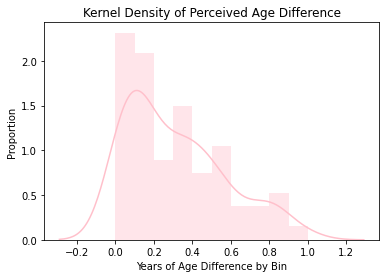

In [58]:
sns.distplot(df['Min&Max'], kde= True, bins =10 , color = 'pink')
plt.title("Kernel Density of Perceived Age Difference")
plt.xlabel("Years of Age Difference by Bin")
plt.ylabel("Proportion")

Min Max isnt seem to be working so lets try Cub root/square root

# Square Root Scaling

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Index,True Age,Age Felt,Age Difference,Zscore,Zscore_Python,Min&Max,Square Root,Zscore_PythonSQ
count,134.0,134.000000,134.000000,134.000000,1.340000e+02,1.340000e+02,134.000000,134.000000,1.340000e+02
mean,1.0,47.492537,32.134328,18.223881,-1.664183e-11,-4.971148e-17,0.314205,3.803529,-1.141914e-15
std,0.0,20.656425,17.200188,14.954890,1.000000e+00,9.969927e-01,0.257843,1.945583,1.000000e+00
min,1.0,4.000000,1.000000,0.000000,-1.218590e+00,-1.214925e+00,0.000000,0.000000,-1.954956e+00
25%,1.0,29.000000,21.000000,6.000000,-8.173835e-01,-8.149254e-01,0.103448,2.449490,-6.959558e-01
50%,1.0,53.000000,29.000000,15.000000,-2.155737e-01,-2.149254e-01,0.258621,3.872983,3.569826e-02
75%,1.0,65.000000,42.000000,28.000000,6.537072e-01,6.517413e-01,0.482759,5.291503,7.647956e-01
max,1.0,86.000000,117.000000,58.000000,2.659740e+00,2.651741e+00,1.000000,7.615773,1.959435e+00


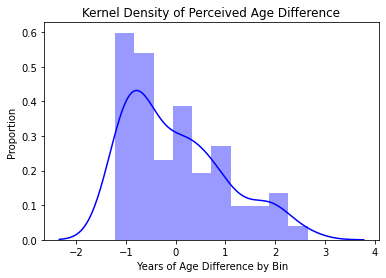

In [59]:
df['Square Root'] = np.sqrt(df['Age Difference'])

sns.distplot(df['Zscore_Python'], kde= True, bins =10 , color = 'blue')
plt.title("Kernel Density of Perceived Age Difference")
plt.xlabel(" Years of Age Difference by Bin")
plt.ylabel("Proportion")

sqmean = df['Square Root'].mean()
sd1 = df['Square Root'].std()

df['Zscore_PythonSQ'] = ((df['Square Root']-sqmean)/sd1)

df.describe()


**It appears that our simple square root method was the correct one to use no need to remove outliers with z scores**